<a href="https://colab.research.google.com/github/nishitaverma/MyMachineLearningNotes/blob/main/deep_learning_revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
!pip install opendatasets opencv-python pillow

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random
import opendatasets as od
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras import datasets, layers, models
import tensorflow_hub as hub
import cv2
import PIL
from google.colab.patches import cv2_imshow

In [3]:
# Helper functions
def plot_confusion_matrix(cm):
  plt.figure(figsize=(7,4))
  sns.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

def plot(img):
  plt.figure(figsize=(10,1))
  plt.imshow(img)

def scale_data(xtr, xte):
  return xtr/255, xte/255

# Building Neural Net for Handwritten Number Detection

Load MNIST Dataset

In [13]:
(xtrain, ytrain), (xtest,ytest)= keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Scaling the data values

In [14]:
xtrain=xtrain/255
xtest=xtest/255

Flatten the data

In [15]:
xtrain_flattened=xtrain.reshape(len(xtrain),28*28)
xtest_flattened=xtest.reshape(len(xtest),28*28)

Define and train the model (without hidden layers)

In [16]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain_flattened, ytrain, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8098 - loss: 0.7247
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9112 - loss: 0.3164
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9206 - loss: 0.2841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9245 - loss: 0.2729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9269 - loss: 0.2611


Evaluation and prediction of model

In [ ]:
model.evaluate(xtest_flattened, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9153 - loss: 0.2994


[0.266279935836792, 0.9258999824523926]

In [ ]:
y_pred=model.predict(xtest_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


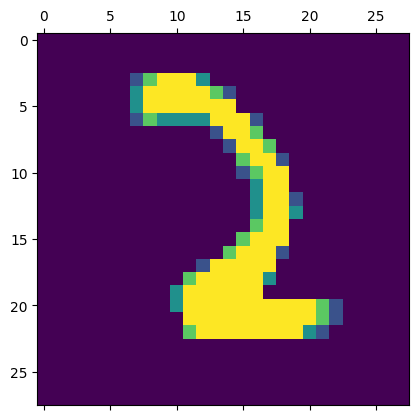

In [ ]:
plt.matshow(xtest[236])

In [ ]:
np.argmax(y_pred[236])

2

In [ ]:
y_pred_labels= [np.argmax(i) for i in y_pred]

In [ ]:
cm= tf.math.confusion_matrix(labels=ytest, predictions= y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    7,    7,    2,    3,    0],
       [   0, 1108,    3,    2,    1,    1,    4,    2,   14,    0],
       [   6,    9,  922,   14,    8,    6,   13,   10,   40,    4],
       [   4,    0,   18,  913,    0,   33,    2,   12,   22,    6],
       [   2,    1,    3,    1,  926,    0,   10,    4,   11,   24],
       [   8,    2,    2,   24,   10,  787,   15,    6,   32,    6],
       [   9,    3,    5,    1,    7,   16,  912,    2,    3,    0],
       [   1,    5,   22,    7,    7,    0,    0,  960,    4,   22],
       [   5,    7,    7,   18,    9,   25,    8,   12,  877,    6],
       [  10,    7,    1,   10,   39,    8,    0,   28,    9,  897]],
      dtype=int32)>

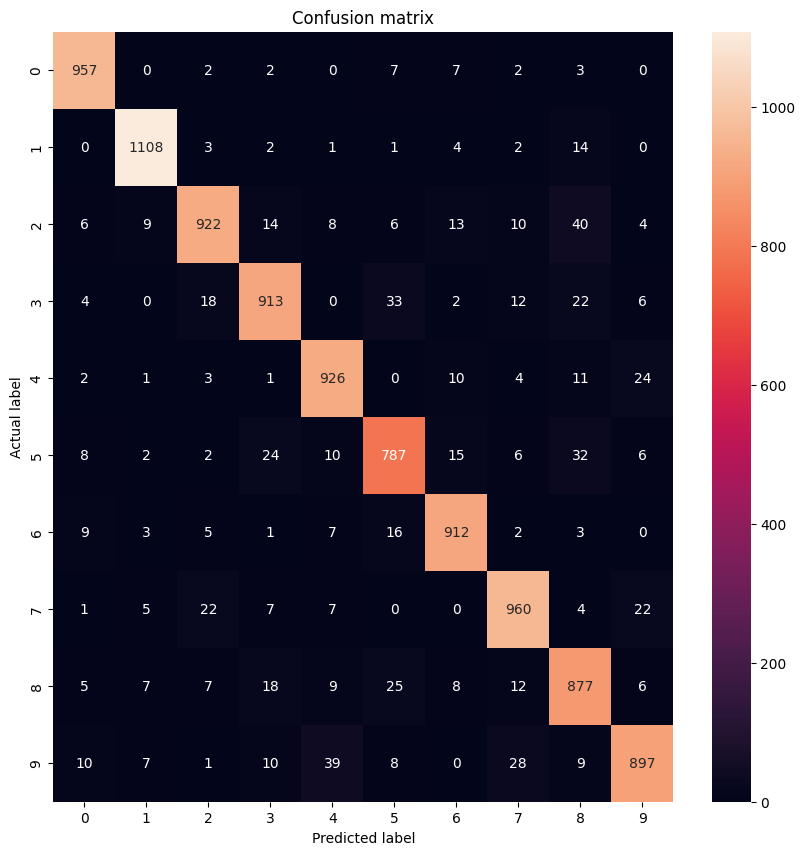

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Defining and training model with hidden layer + flatten layer

In [25]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8736 - loss: 0.4582
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9610 - loss: 0.1347
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9722 - loss: 0.0937
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9794 - loss: 0.0686
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9851 - loss: 0.0505
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9874 - loss: 0.0433
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0351
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9903 - loss: 0.0302
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9928 - loss: 0.0238
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9947 - loss: 0.0179


In [26]:
model.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.1035


[0.08720612525939941, 0.9767000079154968]

In [27]:
y_pred=model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


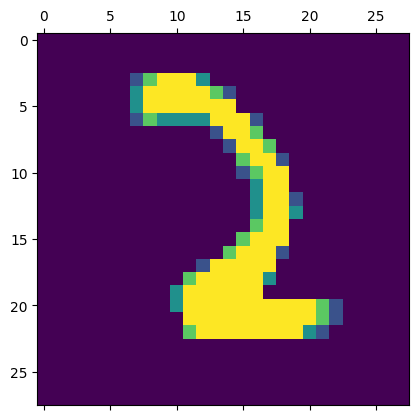

In [28]:
plt.matshow(xtest[236])

In [29]:
np.argmax(y_pred[236])

2

In [30]:
y_pred_labels= [np.argmax(i) for i in y_pred]

In [31]:
cm= tf.math.confusion_matrix(labels=ytest, predictions= y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    3,    0,    0,    1,    2,    2,    3],
       [   0, 1122,    3,    2,    0,    0,    2,    1,    5,    0],
       [   2,    1, 1007,    7,    3,    0,    3,    5,    3,    1],
       [   0,    0,    1,  993,    0,    3,    0,    4,    3,    6],
       [   0,    0,    3,    0,  962,    0,    5,    2,    1,    9],
       [   3,    0,    0,   22,    2,  851,    2,    2,    3,    7],
       [   7,    2,    1,    1,    4,    5,  936,    0,    2,    0],
       [   1,    2,   11,    8,    2,    0,    0,  992,    1,   11],
       [   2,    0,    2,    8,    6,    2,    2,    3,  942,    7],
       [   2,    2,    0,    2,    8,    1,    0,    1,    0,  993]],
      dtype=int32)>

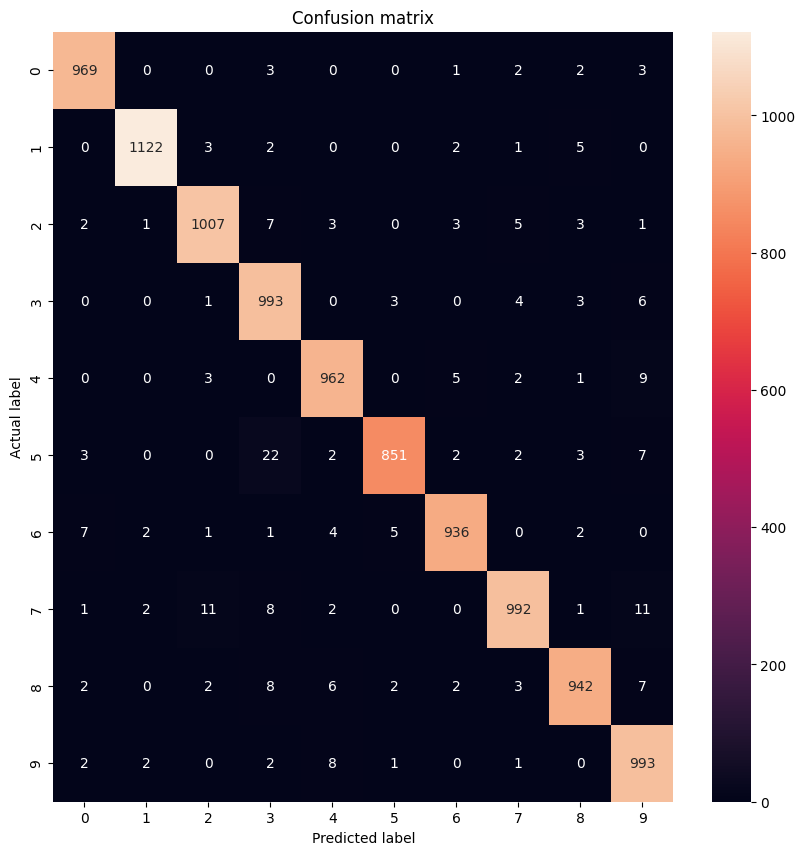

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Cost Functions

In [ ]:
y_true= np.array([0.30, 0.7, 1, 0, 0.5])
y_pred= np.array([1,1,0,0,1])

### Mean Absolute Error

In [ ]:
def MAE(y_true, y_pred):
  total_error=0
  for yt, yp in zip(y_true, y_pred):
    total_error += abs(yt-yp)
  mae= total_error / len(y_true)
  return mae, total_error

def MAE_np(y_true, y_pred):
  mae= np.mean(np.abs(y_true- y_pred))
  return mae

In [ ]:
MAE(y_true, y_pred)

(0.5, 2.5)

In [ ]:
MAE_np(y_true, y_pred)

2.5

### Mean Squared Error

In [ ]:
def MSE(y_true, y_pred):
  total_error=0
  for yt, yp in zip(y_true, y_pred):
    total_error += (yt-yp)**2

  mse= total_error/len(y_true)
  return mse

def MSE_np(y_true, y_pred):
  mse= np.mean(np.square(y_true-y_pred))
  return mse

In [ ]:
MSE(y_true, y_pred)

0.366

In [ ]:
MSE_np(y_true, y_pred)

0.366

### Binary Cross Entropy/ Log Loss

In [ ]:
def log_loss(y_pred, y_true):
  epsilon= 1e-15
  y_pred_new= [max(i, epsilon) for i in y_pred]
  y_pred_new = [min(i, 1- epsilon) for i in y_pred_new]
  y_pred_new= np.array(y_pred_new)
  log_loss= -np.mean(y_true* np.log(y_pred_new)+(1-y_true)*np.log(1-y_pred_new))
  return log_loss

In [ ]:
log_loss(y_pred, y_true)

17.2696280766844

# Gradient Descent
It helps you find the optimium params (weights, bias) for the prediction function to solve a supervised ML problem.
1. Batch gradient descent:
  - entire training data is used for each forward pass in each epoch before updating the weights and biases.
  - it is good for small training dataset
  - Gradient descent and derivative of weight and bias:
  
  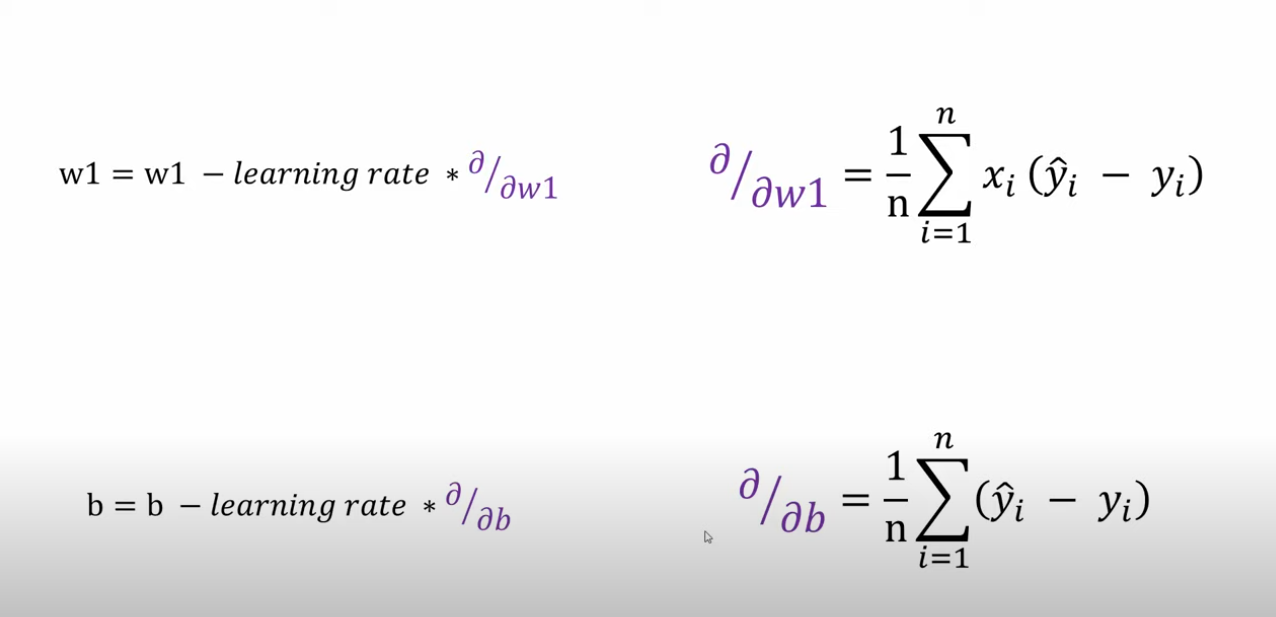

2. Stochastic gradient descent:
  - Use one randomly picked sample datapoint for a forward pass and then adjust weights.
  - good for when training dataset is large and computationally intensive

3. Mini-batch Gradient Descent:
  - Use a batch of randomly picked training samples for a forward pass and update weights accordingly.


In [ ]:
df= pd.read_csv("/content/insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
xtrain, xtest, ytrain, ytest= train_test_split(df[['age', 'affordibility']], df.bought_insurance, test_size=0.2, random_state=25)

In [ ]:
xtrain_scaled= xtrain.copy()
xtrain_scaled['age']= xtrain_scaled['age']/100

xtest_scaled= xtest.copy()
xtest_scaled['age']= xtest_scaled['age']/100

In [ ]:
xtrain_scaled

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1
19,0.18,1
25,0.54,1
16,0.25,0
20,0.21,1
3,0.52,0


In [ ]:
model= keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros' )
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(xtrain_scaled, ytrain, epochs=500)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5000 - loss: 0.7079
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5000 - loss: 0.7076
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5000 - loss: 0.7072


In [ ]:
model.evaluate(xtest_scaled, ytest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.6667 - loss: 0.6210


[0.621041476726532, 0.6666666865348816]

In [ ]:
model.predict(xtest_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.66075516],
       [0.60847205],
       [0.45149705],
       [0.62685424],
       [0.6642366 ],
       [0.68474233]], dtype=float32)

In [ ]:
c, i= model.get_weights()
c,i

(array([[0.7785072 ],
        [0.69779867]], dtype=float32),
 array([-0.39703578], dtype=float32))

### Implementing gradient descent from scratch

In [ ]:
c1= 5.060867
c2= 1.4086502
i= -2.9137027

In [ ]:
def sigmoid_numpy(ws):
  sig= 1/(1+ np.exp(-ws))
  return sig

In [ ]:
def log_loss(y_pred, y_true):
  epsilon= 1e-15
  y_pred_new= [max(i, epsilon) for i in y_pred]
  y_pred_new = [min(i, 1- epsilon) for i in y_pred_new]
  y_pred_new= np.array(y_pred_new)
  log_loss= -np.mean(y_true* np.log(y_pred_new)+(1-y_true)*np.log(1-y_pred_new))
  return log_loss

In [ ]:
def prediction_function(age, affordibility):
  weighted_sum= c1*age + c2*affordibility + i
  return weighted_sum

In [ ]:
def gradient_descent(age, affordibility, y_true, epochs):
  w1= w2= 0
  bias=0
  rate=0.5
  n= len(age)

  for i in range(epochs):
    weighted_sum=  w1*age + w2*affordibility + bias
    y_pred= sigmoid_numpy(weighted_sum)

    loss= log_loss(y_pred, y_true)

    w1d= (1/n)*np.dot(np.transpose(age),(y_pred- y_true))
    w2d= (1/n)*np.dot(np.transpose(age),(y_pred- y_true))
    biasd= np.mean((y_pred- y_true))

    w1= w1 - (rate*w1d)
    w2= w2 - (rate*w2d)
    bias= bias - (rate*biasd)

    print(f"Epoch: {i}, w1: {w1}, w2: {w2}, bias: {bias}, loss: {loss}")

  return w1, w2, bias

In [ ]:
gradient_descent(xtrain_scaled['age'], xtrain_scaled['affordibility'], ytrain, 1000)

Epoch: 0, w1: 0.024318181818181826, w2: 0.024318181818181826, bias: 0.0, loss: 0.6931471805599453
Epoch: 1, w1: 0.04724746116529717, w2: 0.04724746116529717, bias: -0.0031610745742381985, loss: 0.6898545297738365
Epoch: 2, w1: 0.06902725358611059, w2: 0.06902725358611059, bias: -0.008906276572597682, loss: 0.6868970435200148
Epoch: 3, w1: 0.08985435464727304, w2: 0.08985435464727304, bias: -0.016761566076951416, loss: 0.6841771127418349
Epoch: 4, w1: 0.10989035193254423, w2: 0.10989035193254423, bias: -0.026337863483066968, loss: 0.6816282082287253
Epoch: 5, w1: 0.1292678515393219, w2: 0.1292678515393219, bias: -0.037316000307194876, loss: 0.6792049204885218
Epoch: 6, w1: 0.14809565354522408, w2: 0.14809565354522408, bias: -0.04943422479441948, loss: 0.6768761873044764
Epoch: 7, w1: 0.16646302626844767, w2: 0.16646302626844767, bias: -0.06247789076010108, loss: 0.6746206985546155
Epoch: 8, w1: 0.1844432226973587, w2: 0.1844432226973587, bias: -0.07627097840689571, loss: 0.6724237806074

(8.943267934390724, 8.943267934390724, -10.772473409408633)

### Implementing BATCH gradient descent from scratch

In [ ]:
df= pd.read_csv("/content/homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
19,800,1,32.0
13,1100,2,40.0
15,1175,2,42.0
6,2732,4,135.0
11,2785,4,140.0


In [ ]:
sx= preprocessing.MinMaxScaler()
sy= preprocessing.MinMaxScaler()

scaledX= sx.fit_transform(df.drop('price', axis='columns'))
scaledY= sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [ ]:
def batch_gradient_descent(X, ytrue, epochs, learning_rate=0.01):
  features= X.shape[1]
  w= np.ones(shape=(features))
  b=0
  total_samples= X.shape[0]
  cost_list=[]
  epoch_list=[]

  for i in range(epochs):
    ypred= np.dot(w, X.T) + b
    wd= (1/total_samples)*(X.T.dot(ypred-ytrue))
    bd= (1/total_samples)*(np.sum(ypred-ytrue))

    w= w - learning_rate * wd
    b= b - learning_rate * bd

    #mse
    cost = np.mean(np.square(ytrue-ypred))

    if i% 10:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

In [ ]:
w, b, cost, cost_list, epoch_list= batch_gradient_descent(scaledX, scaledY.reshape(scaledY.shape[0],), 500)
w, b, cost

(array([0.76105393, 0.73123417]), -0.2804780207993739, 0.010381267271798262)

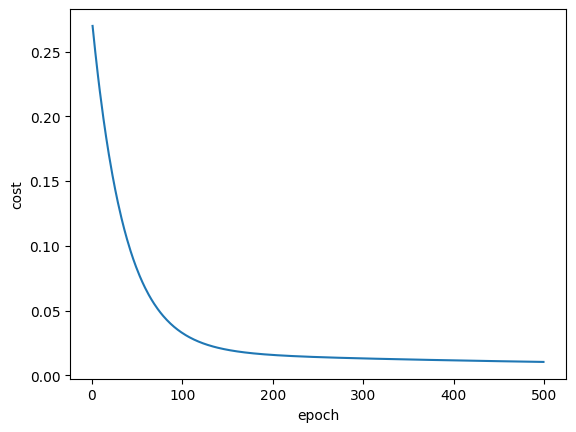

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [ ]:
def predict(area, bedrooms, w, b):
  scaledX= sx.transform([[area, bedrooms]])[0]
  scaledPrice= w[0]*scaledX[0] + w[1]*scaledX[1] + b
  return sy.inverse_transform([[scaledPrice]])[0][0]

In [ ]:
predict(1000, 2, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


25.900294923659178

### Implementing STOCHASTIC gradient descent from scratch

In [ ]:
def stochastic_gradient_descent(X, ytrue, epochs, learning_rate=0.01):
  features= X.shape[1]
  w= np.ones(shape=(features))
  b=0
  total_samples= X.shape[0]
  cost_list=[]
  epoch_list=[]

  for i in range(epochs):
    r= random.randint(0, total_samples-1)
    samx= X[r]
    samy= ytrue[r]
    ypred= np.dot(w, samx.T) + b

    wd= (2/total_samples)*(samx.T.dot(ypred-samy))
    bd= (2/total_samples)*(np.sum(ypred-samy))

    w= w - learning_rate * wd
    b= b - learning_rate * bd

    #mse
    cost = np.mean(np.square(ytrue-ypred))

    if i% 100==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

In [ ]:
sgw, sgb, sgcost, sgcost_list, sgepoch_list = stochastic_gradient_descent(scaledX, scaledY.reshape(scaledY.shape[0],), 10000)
sgw, sgb, sgcost

(array([0.70603104, 0.67577659]), -0.2255791949329805, 0.12002801658974176)

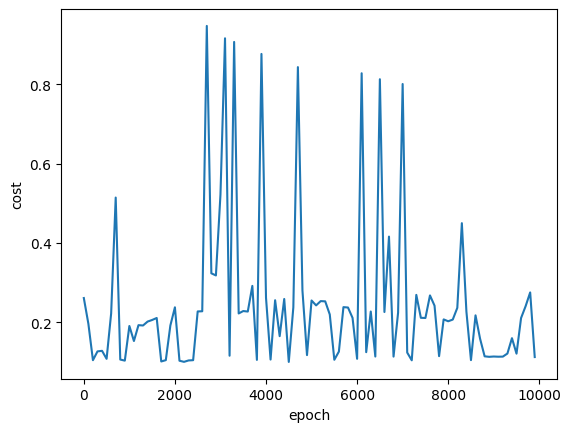

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(sgepoch_list, sgcost_list)

In [ ]:
predict(1000, 2, sgw, sgb)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.92766091467834

### Implementing MINI BATCH Gradient Descent

In [ ]:
def mini_batch_gradient_descent(X, ytrue, epochs, learning_rate=0.01, batch_size=5):
  features= X.shape[1]
  w= np.ones(shape=(features))
  b=0
  total_samples= X.shape[0]
  cost_list=[]
  epoch_list=[]

  if batch_size > total_samples:
    batch_size = total_samples

  num_batches= int(total_samples/batch_size)

  for i in range(epochs):
    r= np.random.permutation(total_samples)
    samx= X[r]
    samy= ytrue[r]
    # ypred= np.dot(w, samx.T) + b
    for j in range(0, total_samples, batch_size):
      xj= samx[j:j+batch_size]
      yj= samy[j:j+batch_size]
      ypred= np.dot(w, xj.T) + b
      wd= (2/len(xj))*(xj.T.dot(ypred-yj))
      bd= (2/len(xj))*(np.sum(ypred-yj))

      w= w - learning_rate * wd
      b= b - learning_rate * bd

      #mse
      cost = np.mean(np.square(yj-ypred))

    if i% 100==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

In [ ]:
mbgw, mbgb, mbgcost, mbgcost_list, mbgepoch_list = mini_batch_gradient_descent(scaledX, scaledY.reshape(scaledY.shape[0],), 10000)
mbgw,  mbgb, mbgcost

(array([0.92157807, 0.20365864]), -0.07423393440894495, 0.0025942402211840115)

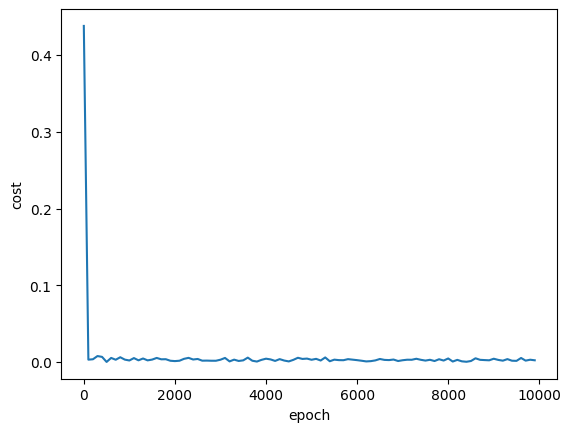

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(mbgepoch_list, mbgcost_list)

In [ ]:
predict(2600, 4, mbgw, mbgb)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


119.820742940882

# Neural Net from scratch

In [ ]:
class NN():
  def __init__(self):
    self.w1= 1
    self.w2= 1
    self.bias= 0

  def fit(self, X, y, epochs, loss_thresh):
    self.w1, self.w2, self.bias = self.gradient_descent(X['age'], X['affordibility'], y, 1000, loss_thresh)

  def predict(self, X_test):
    ws= self.w1 * X_test['age'] + self.w2 * X_test['affordibility'] + self.bias
    y_pred= sigmoid_numpy(ws)
    return y_pred


  def gradient_descent(self, age, affordibility, y_true, epochs, loss_thresh):
    w1= w2= 0
    bias=0
    rate=0.5
    n= len(age)

    for i in range(epochs):
      weighted_sum=  w1*age + w2*affordibility + bias
      y_pred= sigmoid_numpy(weighted_sum)

      loss= log_loss(y_pred, y_true)

      w1d= (1/n)*np.dot(np.transpose(age),(y_pred- y_true))
      w2d= (1/n)*np.dot(np.transpose(age),(y_pred- y_true))
      biasd= np.mean((y_pred- y_true))

      w1= w1 - (rate*w1d)
      w2= w2 - (rate*w2d)
      bias= bias - (rate*biasd)

      if loss >= loss_thresh:
        break

      print(f"Epoch: {i}, w1: {w1}, w2: {w2}, bias: {bias}, loss: {loss}")

    return w1, w2, bias

In [ ]:
myModel= NN()
myModel.fit(xtrain_scaled, ytrain, 1000, 0.88)

Epoch: 0, w1: 0.024318181818181826, w2: 0.024318181818181826, bias: 0.0, loss: 0.6931471805599453
Epoch: 1, w1: 0.04724746116529717, w2: 0.04724746116529717, bias: -0.0031610745742381985, loss: 0.6898545297738365
Epoch: 2, w1: 0.06902725358611059, w2: 0.06902725358611059, bias: -0.008906276572597682, loss: 0.6868970435200148
Epoch: 3, w1: 0.08985435464727304, w2: 0.08985435464727304, bias: -0.016761566076951416, loss: 0.6841771127418349
Epoch: 4, w1: 0.10989035193254423, w2: 0.10989035193254423, bias: -0.026337863483066968, loss: 0.6816282082287253
Epoch: 5, w1: 0.1292678515393219, w2: 0.1292678515393219, bias: -0.037316000307194876, loss: 0.6792049204885218
Epoch: 6, w1: 0.14809565354522408, w2: 0.14809565354522408, bias: -0.04943422479441948, loss: 0.6768761873044764
Epoch: 7, w1: 0.16646302626844767, w2: 0.16646302626844767, bias: -0.06247789076010108, loss: 0.6746206985546155
Epoch: 8, w1: 0.1844432226973587, w2: 0.1844432226973587, bias: -0.07627097840689571, loss: 0.6724237806074

In [ ]:
myModel.predict(xtest_scaled)

,0
2,0.911504
10,0.456197
21,0.000294
11,0.665766
14,0.924498
9,0.971881


# Chain Rule

*Partial derivates help us find out, for a give change in x, what will be the change in y?*

The chain rule is a fundamental concept in calculus that allows us to find the derivative of composite functions. It states that if we have a function, y=f(g(x)), where g is a function of x and f is a function of g, then the derivative of y with respect to x is given by:

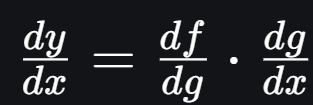

This means, that for a neural network like this, the partial derivative of loss (L) with respect to weight associated with area (w1) will be as below:
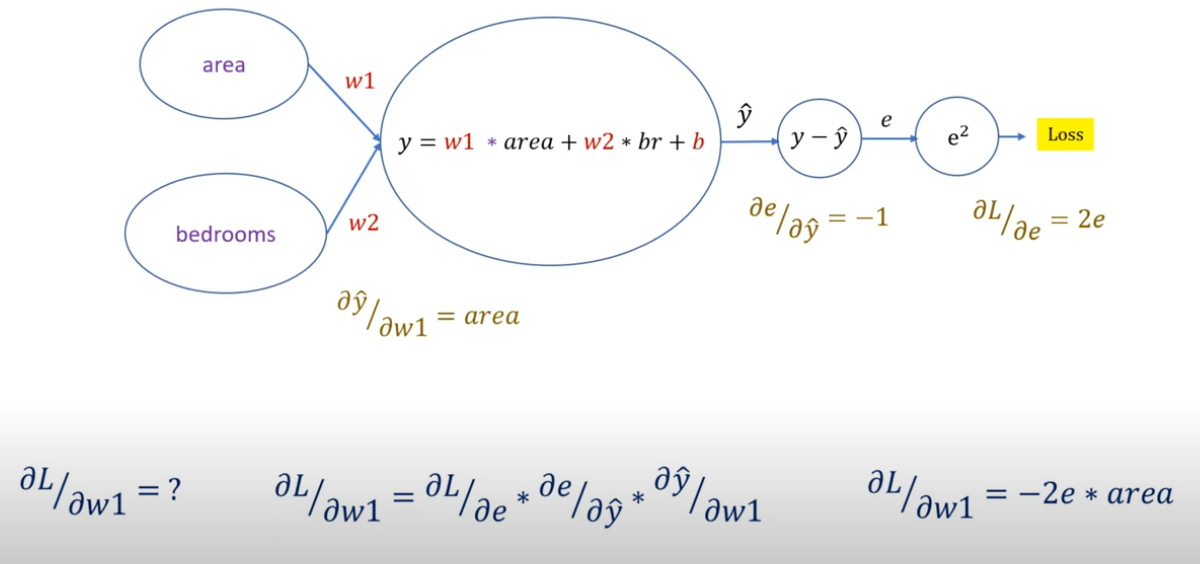

For a more complex network, to study the effect of change in b on z, chain rule can be applied as:

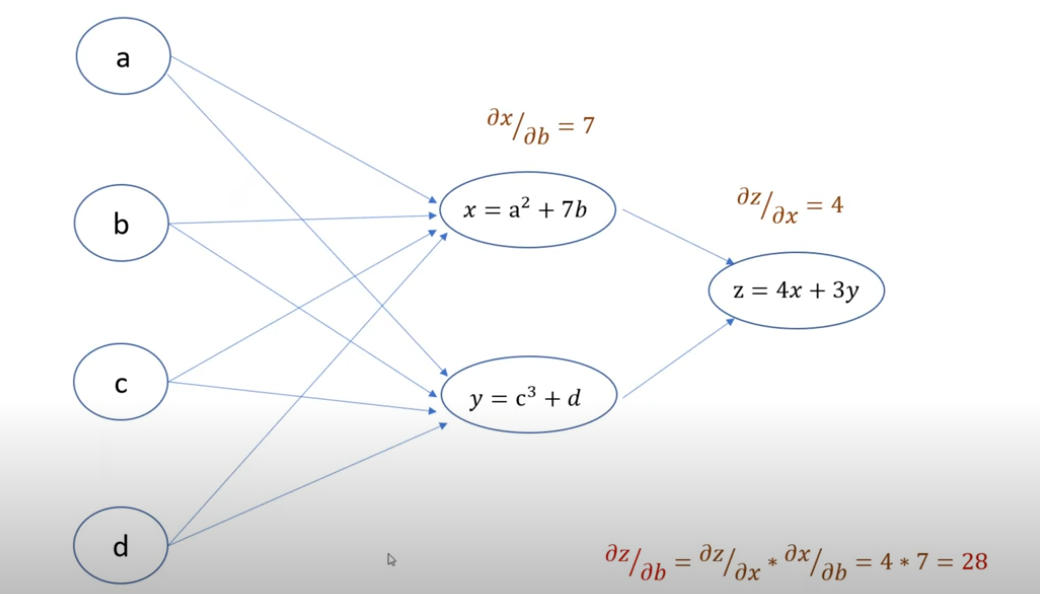

# Image classification using ANN

### CIFAR DATASET

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
(xtrain, ytrain), (xtest, ytest)= tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [4]:
xtrain.shape

(50000, 32, 32, 3)

In [5]:
classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
#normalization

xtrain_scaled= xtrain/255
xtest_scaled= xtest/255

In [7]:
ytrain_categ= keras.utils.to_categorical(ytrain, num_classes=10)
ytest_categ= keras.utils.to_categorical(ytest, num_classes=10)

In [8]:
ytest_categ[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [9]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation= 'relu' ),
    keras.layers.Dense(1000, activation= 'relu' ),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain_scaled, ytrain_categ, epochs= 50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3006 - loss: 1.9368
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4188 - loss: 1.6499
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4555 - loss: 1.5516
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4786 - loss: 1.4863
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4948 - loss: 1.4423
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5116 - loss: 1.3908
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5239 - loss: 1.3509
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5372 - loss: 1.3182
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5525 - loss: 1.2798
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5646 - loss: 1.2550
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5684 - loss: 1.2267
Epoch 12/50
1563/1563 ━━━━━━━━

In [11]:
ypred= model.predict(xtest_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [16]:
classes[np.argmax(ypred[1])]


'ship'

In [19]:
model.evaluate(xtest_scaled, ytest_categ)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5437 - loss: 1.6714


[1.6658445596694946, 0.5425999760627747]

### MNIST FASHION DATASET

In [3]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

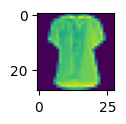

In [6]:
def plot(img):
  plt.figure(figsize=(10,1))
  plt.imshow(img)

plot(xtrain[55])

In [7]:
xtrain_scaled= xtrain/255
xtest_scaled= xtest/255

In [8]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]


In [14]:
ytrain_c= keras.utils.to_categorical(ytrain, num_classes=10)
ytest_c= keras.utils.to_categorical(ytest, num_classes=10)

In [20]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # use Input((28,28)) instead
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),

])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'f1_score'])

model.fit(xtrain_scaled, ytrain_c, epochs=25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7740 - f1_score: 0.7712 - loss: 0.6179
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8612 - f1_score: 0.8603 - loss: 0.3776
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8791 - f1_score: 0.8774 - loss: 0.3340
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8870 - f1_score: 0.8868 - loss: 0.3047
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8944 - f1_score: 0.8935 - loss: 0.2890
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8989 - f1_score: 0.8986 - loss: 0.2773
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9027 - f1_score: 0.9021 - loss: 0.2564
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9051 - f1_score: 0.9048 - loss: 0.2505
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9100 - f1_score: 0.9091 - loss: 0.2385
Epoch 10/25
1875/1875 ━━━━━━━━━━━━

In [21]:
ypred= model.predict(xtest_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
model.evaluate(xtest_scaled, ytest_c)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8932 - f1_score: 0.8942 - loss: 0.5138


[0.4836830198764801,
 0.895799994468689,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.84809494, 0.98688185, 0.8105065 , 0.90251255, 0.7995802 ,
        0.9704852 , 0.73438287, 0.95901227, 0.97728413, 0.96780676],
       dtype=float32)>]

# Customer Churn Prediction using ANN

In [4]:
od.download("https://www.kaggle.com/datasets/blastchar/telco-customer-churn")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nishitaverma
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


100%|██████████| 172k/172k [00:00<00:00, 40.9MB/s]

In [50]:
df= pd.read_csv("/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

### EDA and Data Cleaning

In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
df.drop(columns="customerID", inplace=True)

In [53]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [54]:
len(df[pd.to_numeric(df["TotalCharges"], errors='coerce').isnull()])

11

In [55]:
df1= df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [56]:
df1["TotalCharges"]= pd.to_numeric(df1["TotalCharges"])
df1.dtypes

<ipython-input-56-b9808805430f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalCharges"]= pd.to_numeric(df1["TotalCharges"])


,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


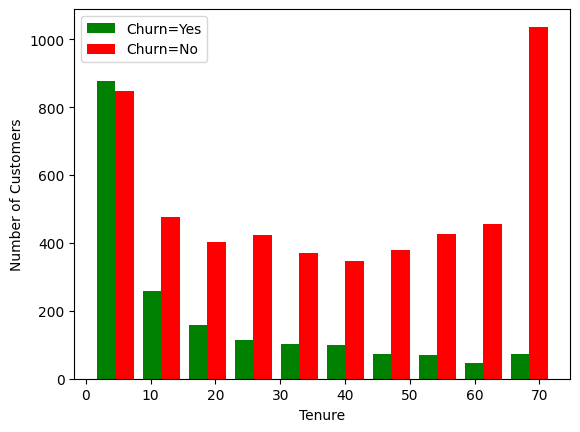

In [57]:
tenure_churn_no= df1[df1.Churn=='No'].tenure
tenure_churn_yes= df1[df1.Churn=='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

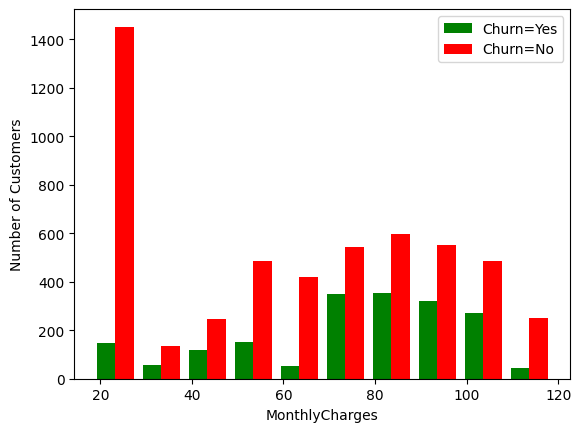

In [58]:
MonthlyCharges_churn_no= df1[df1.Churn=='No'].MonthlyCharges
MonthlyCharges_churn_yes= df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [70]:
def print_uniques(df1):
  uniq=[]
  for col in df1:
    if df1[col].dtypes=='object':
      print(f'{col}: {df1[col].unique()}')
      uniq.append(col)
  return uniq

In [60]:
print_uniques(df1)
df1.replace('No internet service', 'No', inplace=True)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


<ipython-input-60-c09f41a9947f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)


In [61]:
print_uniques(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [62]:
df1.replace('No phone service', 'No', inplace=True)

<ipython-input-62-9c25d7abc358>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [63]:
yn_cols=[]
for col in df1:
    if len(df1[col].unique())==2 and 'No' in df1[col].unique() and 'Yes' in df1[col].unique():
      print(col)
      yn_cols.append(col)

print(yn_cols)

Partner
Dependents
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
Churn
['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [64]:
for col in yn_cols:
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

<ipython-input-64-5aaaf0fa66fb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)
<ipython-input-64-5aaaf0fa66fb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)
<ipython-input-64-5aaaf0fa66fb>:2:

In [65]:
print_uniques(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [67]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

<ipython-input-67-64ef42fe16d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
<ipython-input-67-64ef42fe16d3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
<ipython-input

In [72]:
categ_cols= print_uniques(df1)
print(categ_cols)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['InternetService', 'Contract', 'PaymentMethod']


In [79]:
df2= pd.get_dummies(data=df1, columns=categ_cols, dtype=int)

In [80]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [82]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


### Scaling and Splitting Dataset

In [84]:
cols_to_scale= ['tenure', 'TotalCharges', 'MonthlyCharges']
scaler= MinMaxScaler()

df2[cols_to_scale]= scaler.fit_transform(df2[cols_to_scale])

In [87]:
for col in df2:
  print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [88]:
x= df2.drop('Churn', axis='columns')
y= df2['Churn']

In [89]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size= 0.2, random_state= 45)

In [95]:
xtrain.shape

(5625, 26)

In [96]:
xtest.shape

(1407, 26)

### Defining Model

In [104]:
model= keras.Sequential([
    keras.layers.Dense(26, input_shape=(26, ), activation= 'relu'),
    keras.layers.Dense(75, activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics= ['accuracy'])

model.fit(xtrain, ytrain, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7305 - loss: 0.5585
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7378 - loss: 0.5053
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7384 - loss: 0.4843
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7853 - loss: 0.4473
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7848 - loss: 0.4576
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7940 - loss: 0.4425
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7911 - loss: 0.4398
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4377
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7936 - loss: 0.4314
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.4264
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7918 - loss: 0.4299
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

### Evaluation

In [105]:
model.evaluate(xtest, ytest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8044 - loss: 0.4128  


[0.4412107765674591, 0.7889125943183899]

In [109]:
ypred= []
yp= model.predict(xtest)
for y in yp:
  if y > 0.5:
    ypred.append(1)
  else:
    ypred.append(0)


cr= classification_report(ytest, ypred)
print(cr)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1021
           1       0.66      0.47      0.55       386

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [111]:
cm = confusion_matrix(ytest, ypred)
cm

array([[928,  93],
       [204, 182]])

Text(58.222222222222214, 0.5, 'Truth')

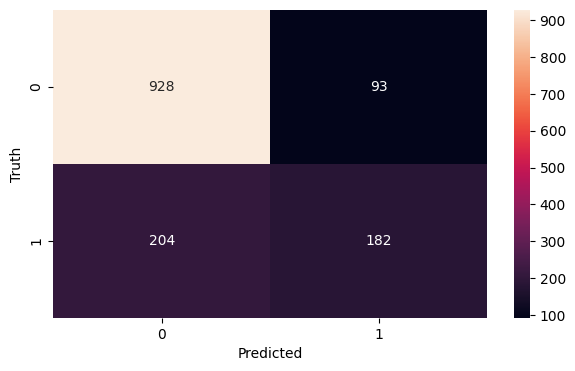

In [116]:
plt.figure(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Precision, Recall, F1 Score:
  - Precision: when thinking about precision, you decide this based on your models predictions. It takes into account the number of times your model correctly predicted a class as positive (TP) and the times it incorrectly predicted a class as positive (FP)
               P = TP/TP+FP
  - Recall: This is decided based on the ground truth label. It takes into consideration the number of times your model correctly predicted a class as positive (TP) and the times it incorrectly predicted as negative (TN)
              R = TP/TP+FN

  - F1 Score: Harmonic mean of precision and recall
              F1= 2*P*R/ P+R


              


In [117]:
# P = TP/TP+FP
precision= 182/ (182+93)
precision

0.6618181818181819

In [120]:
# R= TP/TP+FN
recall= 182/(182+204)
recall

0.47150259067357514

In [122]:
#F1= 2PR/P+R
f1= (2*precision*recall)/(precision+recall)
f1

0.5506807866868381

# Regularization in Deeplearning:

1. Dropout Regularization:
  - At every iteration, it randomly selects some neurons and removes them along with all of their incoming and outgoing connections. It can be applied to both the hidden layers as well as the input layers.
  - How it helps: The model cant rely on certain neurons as they might get dropped out at random. Also, neurons will not learn redudant details of the inputs.

In [132]:
df= pd.read_csv("/content/sonar_dataset.csv", header=None)

In [133]:
df.shape

(208, 61)

In [134]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [135]:
df[60].replace({"R": 1, "M": 0}, inplace= True)

<ipython-input-135-7409a4dad75e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[60].replace({"R": 1, "M": 0}, inplace= True)
<ipython-input-135-7409a4dad75e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[60].replace({"R": 1, "M": 0}, inplace= True)


In [140]:
x= df.drop(60, axis='columns')
y= df[60]


In [141]:
xtr, xte, ytr, yte= train_test_split(x, y, test_size=0.25, random_state=66)

In [142]:
model= keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation= 'relu'),
    keras.layers.Dense(30, activation= 'relu'),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

model.fit(xtr, ytr, epochs=100, batch_size= 8)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5200 - loss: 0.7031
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6251 - loss: 0.6658
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6476 - loss: 0.6448 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7199 - loss: 0.6089
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7012 - loss: 0.5891
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7842 - loss: 0.5638
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7626 - loss: 0.5254
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8299 - loss: 0.4817
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8321 - loss: 0.4435
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7461 - loss: 0.4787
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7550 - loss: 0.4423
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8621 - l

In [143]:
model.evaluate(xte, yte)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8093 - loss: 0.9948 


[1.056793451309204, 0.807692289352417]

In [144]:
ypred= model.predict(xte).reshape(-1)

ypred= np.round(ypred)
ypred[0]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


0.0

In [147]:
cr= classification_report(yte, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        31
           1       0.87      0.62      0.72        21

    accuracy                           0.81        52
   macro avg       0.83      0.78      0.79        52
weighted avg       0.82      0.81      0.80        52



In [153]:
#Using dropout

model= keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation= 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation= 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

model.fit(xtr, ytr, epochs=70, batch_size= 8)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5635 - loss: 0.7369
Epoch 2/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4004 - loss: 0.7570 
Epoch 3/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5673 - loss: 0.6669  
Epoch 4/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4993 - loss: 0.7088  
Epoch 5/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5514 - loss: 0.6969 
Epoch 6/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4664 - loss: 0.7087 
Epoch 7/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5256 - loss: 0.7062 
Epoch 8/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4561 - loss: 0.6957 
Epoch 9/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6264 - loss: 0.6578 
Epoch 10/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6092 - loss: 0.6649 
Epoch 11/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5613 - loss: 0.6720 
Epoch 12/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [154]:
model.evaluate(xte, yte)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8197 - loss: 0.4396 


[0.45325806736946106, 0.807692289352417]

In [155]:
ypred= model.predict(xte).reshape(-1)

ypred= np.round(ypred)
ypred[0]

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


1.0

In [156]:
cr= classification_report(yte, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        31
           1       0.82      0.67      0.74        21

    accuracy                           0.81        52
   macro avg       0.81      0.78      0.79        52
weighted avg       0.81      0.81      0.80        52



# Convolutional Neural Network

  - It is a commonly used deep learning neural network used in computer vision, for performing image classification tasks.
  - A simple ANN cannot be used for image classification tasks with complex data (large images) as the number of neurons and weights to be calculated  to train a model will be exponentially large, therefore excessive computations.
  - Also, ANN treats local pixels the same as pixels far apart.
  - ANNs are also sensitive to the location of the object in the image.

**CNN is able to solve these problems with the help of convolutional operations:**
  - Convolution Neural Networks or covnets are neural networks that share their parameters.
  - **Convolution operation** involves the use of a small square filter (eg 3x3) to represent parts of the image. The area of our filter is also called the receptive field, named after the neuron cells.
  - The **dot product** of the filter/kernel weights and the input scaled pixel values is calculated, and then **summed up which results in a final value for that patch of input image that is added to a feature map** to represent that part of the image.
  - Once the operation for that part of the image is done, the kernel slides over to the next part of the image, also called as taking a stride. The stride can be of 1 or 2 or more in value.
  - As we slide our filters we'll get a 2-D output for each filter and we'll stack them together as a result, we'll get output volume having a depth equal to the number of filters. The network will learn all the filters.
  - We perfom numerous convolutions on our input, where each operation uses a different filter. This results in different feature maps. In the end, we take all of these feature maps and put them together as the final output of the convolution layer.
  - ReLU activation is used to introduce non linearity which helps in solving complex problems like obect detection. It also helps speed up computation and training.
  - **Padding**: Because the size of the feature map is always smaller than the input, a layer of zero-value pixels is added to surround the input with zeros, so that our feature map will not shrink. In addition to keeping the spatial size constant after performing convolution, padding also improves performance and makes sure the kernel and stride size will fit in the input.
  - **Pooling:** Pooling operation helps reduce the dimensionality of the feature map. This reduces the number of parameters and computation in the network. It also shortens the training time and controls overfitting. Max pooling is a type of pooling that selects the max value from a particular region of the image. Max pooling helps detect position invariant feature detection. There's also average pooling which takes the average value.

**Disadvantages of CNNs:**
Computationally expensive to train and require a lot of memory.
- Can be prone to overfitting if not enough data or proper regularization is used.
- Requires large amounts of labeled data.
- Interpretability is limited, it's hard to understand what the network has learned.


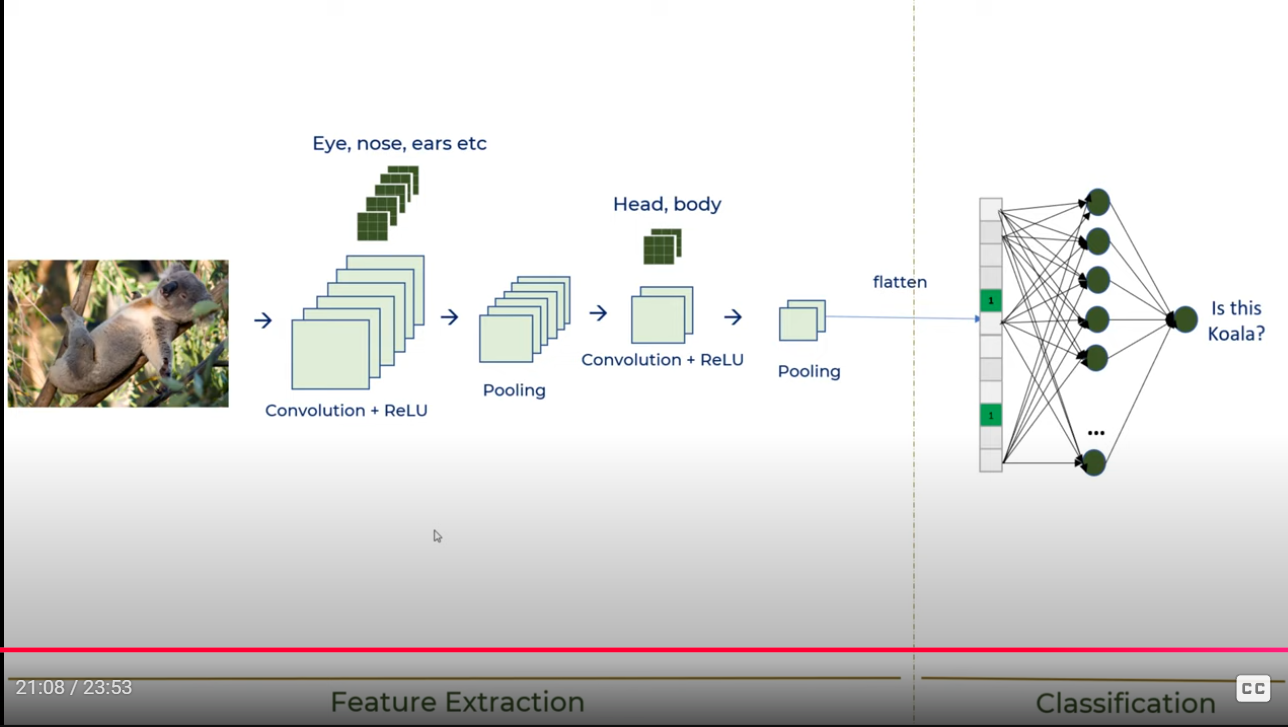

In [35]:
(xtr, ytr), (xte, yte) = datasets.cifar10.load_data()

In [36]:
xtr.shape

(50000, 32, 32, 3)

In [37]:
ytr = ytr.reshape(-1,)
ytr[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [27]:
classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [38]:
def plot( x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  print(y[index])
  plt.xlabel(classes[y[index]])

9


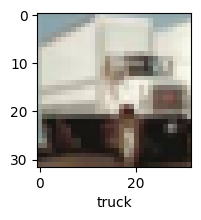

In [39]:
plot(xtr, ytr, 444)

In [40]:
xtr_scaled= xtr/ 255
xte_scaled= xte/ 255

In [54]:
cnn = keras.Sequential([
    layers.Conv2D(filters= 32, strides=(2,2), padding='same', kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters= 64, strides=(1,1), padding='same', kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
cnn.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(xtr_scaled, ytr, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.3630 - loss: 1.7358
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5679 - loss: 1.2146
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6347 - loss: 1.0479
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.6704 - loss: 0.9448
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.6964 - loss: 0.8722
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.7124 - loss: 0.8206
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7325 - loss: 0.7690
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7444 - loss: 0.7313
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.7614 - loss: 0.6841
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.7705 - loss: 0.6554


In [55]:
yte= yte.reshape(-1,)
cnn.evaluate(xte_scaled, yte)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6958 - loss: 0.8970


[0.907639741897583, 0.6980999708175659]

In [56]:
ypred= cnn.predict(xte_scaled)
ypred_c= [np.argmax(i) for i in ypred]
print(ypred_c)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[3, 8, 0, 0, 4, 6, 1, 6, 3, 1, 0, 9, 3, 7, 9, 8, 5, 7, 8, 6, 7, 0, 0, 9, 4, 4, 4, 0, 9, 6, 6, 4, 4, 3, 9, 9, 4, 1, 9, 5, 0, 6, 7, 6, 0, 9, 3, 9, 7, 4, 9, 8, 7, 3, 8, 8, 7, 5, 5, 5, 7, 5, 6, 9, 6, 6, 1, 2, 5, 7, 0, 3, 8, 8, 0, 2, 0, 3, 3, 8, 8, 1, 1, 7, 2, 7, 3, 8, 8, 9, 0, 6, 8, 6, 4, 7, 6, 0, 0, 7, 4, 7, 6, 7, 1, 1, 2, 6, 8, 7, 4, 0, 2, 2, 1, 7, 0, 4, 4, 5, 0, 7, 1, 2, 8, 0, 0, 3, 3, 0, 4, 1, 8, 9, 1, 2, 9, 7, 2, 8, 3, 5, 6, 5, 8, 3, 6, 6, 5, 5, 8, 9, 6, 0, 0, 5, 2, 9, 7, 4, 0, 1, 4, 4, 0, 4, 8, 4, 7, 0, 9, 0, 0, 8, 9, 9, 3, 7, 3, 0, 0, 7, 2, 2, 5, 8, 6, 3, 3, 0, 6, 3, 0, 1, 7, 4, 8, 8, 7, 8, 5, 0, 8, 7, 1, 3, 0, 5, 7, 9, 5, 0, 5, 9, 8, 4, 7, 9, 0, 4, 4, 3, 9, 4, 4, 9, 3, 2, 3, 2, 3, 1, 5, 8, 8, 0, 4, 0, 3, 5, 1, 9, 1, 9, 0, 6, 1, 8, 2, 4, 7, 3, 9, 9, 2, 8, 3, 0, 8, 9, 8, 1, 3, 3, 0, 8, 8, 4, 7, 0, 2, 4, 6, 3, 8, 5, 0, 2, 4, 5, 9, 0, 4, 1, 0, 9, 8, 8, 7, 9, 1, 2, 6, 1, 3, 2, 6, 0, 0, 6, 6, 6, 5, 2, 4, 1, 9, 2, 1, 2, 0, 6, 8, 8, 4, 0, 7, 7, 5, 5

In [57]:
cr= classification_report(yte, ypred_c)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      1000
           1       0.87      0.76      0.81      1000
           2       0.62      0.58      0.60      1000
           3       0.58      0.44      0.50      1000
           4       0.57      0.74      0.64      1000
           5       0.67      0.55      0.61      1000
           6       0.84      0.68      0.75      1000
           7       0.64      0.82      0.72      1000
           8       0.77      0.83      0.80      1000
           9       0.82      0.75      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



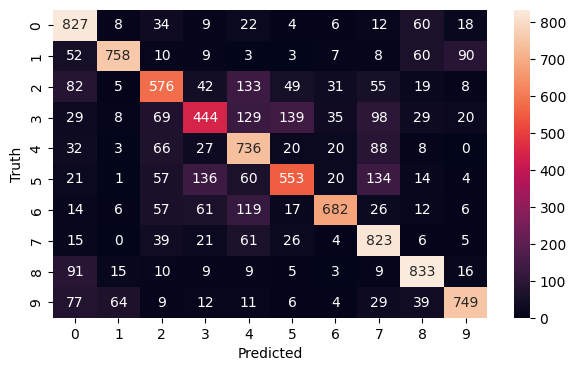

In [58]:
cm= confusion_matrix(yte, ypred_c)
plot_confusion_matrix(cm)


# U-net CNNs:
- Unet CNNs are deep learning neural net architectures that are used for tasks such as image segmentation, and are the basis on which generative models such as GANs and diffusion models are built.
- Great for high resolution inputs.
- Tasks can include mapping images to their segmentation masks, image segmentation, uscaling low to high resolution images, and transforming gaussian noise to newly geenarted images.

**Architecture and working:**
- Consists of an encoder and a decoder. The encoder extracts features from the image input, and decoder upsamples intermediate features to produce output image.
- the encoder and decoder are symmetrical and form a U shape, hence the name. Both of these are made up of repeated convolution and pooling layers.
- For each encoder conv+pooling layers, which extract features from the input image, the corresponding decoder layers later upsample the extracted features, by concatenating the saved copy of the encoders features on top of the decoders features via connections.
- The first layer of the encoder learns the high resolution features, such as edges. The layers there after learn features from a downsampled version (due to maxpooling) of the image, there by picking up shapes and colors. This results in the decoder first generating an image using the last encoder layer features, so the low resolution shapes, followed by increased resultion features such as colors, shapes and then edges.
- The final layer then produces the resultant image.
- The loss is calculated and then the gradients and backpropagated through the network to update the weights.

1. Encoder:
  - Repeated 3*3 convolutional + ReLU layers.
  - After each conv layer, 2*2 max pooling layer is there to down sample the image. This reduces spatial dims of the image
  - To compensate for that, the channels are doubled after each downsampling operation.
  - Encoders features contain spatial features such as the exact pixels and their values for the object

2. Decoder:
  - Repeated 3*3 convolutional + ReLU layers.
  - This is followed by upsampling the features and applies 2*2 conv layer to halve the number of channels. Upsampling restores the spatial dimensions.
  - Decoders features contain more semantic information, such as the location of the object

3. Connections:
They are of two types:
  - Connecting paths: They take a copy of the features from the encoder layer and concatenate them to the opposing/respective stage of the decoder features. Combining the features from encoder and decoder results in perfect segmentation of the object.
  - Bottle neck: The bridge between encoder and decoder. Here the operations include first downsampling the image with max pooling, followed by conv and relu layers and doubling of channels, and finally upsampling them to their previous resolution.
